In [ ]:
from pathlib import Path
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lib
import librosa.display
import numpy as np
from IPython.display import Audio
from IPython.core.display import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1) Work with data


create set of emo.

In [ ]:
PATH = Path('/content/drive/MyDrive/Crema')
filespath = list(PATH.glob(r'**/*.wav'))
emo_labels = list(map(lambda x: os.path.split(x)[1].split('_')[2], filespath))
set(emo_labels)

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

create dataframe of wav files paths and labels


In [ ]:
#TODO: REPLACE FEATURE LABEL WITH AUDIO SIGNAL 
audio_signal = []
samples_rate =  []
files_path = pd.Series(filespath , name='.wav_path').astype(str)
labels = pd.Series(emo_labels , name='labels')

for audios in files_path:
    audio , sample_rate = lib.load(audios)
    audio_signal.append(audio)
    samples_rate.append(sample_rate)

audio_features = pd.Series(audio_signal , name='signal')
data = pd.concat([files_path,audio_features,labels] , axis=1)
data

,.wav_path,signal,labels
0,/content/drive/MyDrive/Crema/1081_MTI_FEA_XX.wav,"[-0.0013267642, -0.0011507067, -0.00074600475,...",FEA
1,/content/drive/MyDrive/Crema/1081_IOM_HAP_XX.wav,"[0.00406869, 0.004215974, 0.0030919232, 0.0023...",HAP
2,/content/drive/MyDrive/Crema/1081_ITS_ANG_XX.wav,"[-0.00031764526, -0.00031087518, 0.00014127654...",ANG
3,/content/drive/MyDrive/Crema/1079_TSI_DIS_XX.wav,"[0.001069233, 0.0007935993, -0.00016964517, -0...",DIS
4,/content/drive/MyDrive/Crema/1081_IWL_HAP_XX.wav,"[3.5962148e-05, 0.00024702173, 0.00045050596, ...",HAP
...,...,...,...
7446,/content/drive/MyDrive/Crema/1006_IOM_SAD_XX.wav,"[0.0014635584, 0.0016795307, 0.0010614916, 0.0...",SAD
7447,/content/drive/MyDrive/Crema/1007_TSI_SAD_XX.wav,"[0.0033311676, 0.004324746, 0.0038436854, 0.00...",SAD
7448,/content/drive/MyDrive/Crema/1006_TAI_SAD_XX.wav,"[0.00387666, 0.0033433223, 0.002694597, 0.0031...",SAD
7449,/content/drive/MyDrive/Crema/1006_ITS_ANG_XX.wav,"[-0.00012446963, -0.000649155, -0.0005525435, ...",ANG


Play audio and plot wave for each class


In [ ]:
def play_and_plot():
  for i in set(emo_labels):
    plt.title(i + " AUDIO")
    sad_audios = data[data['labels'] == i]['.wav_path']
    sad_feature =  data[data['labels'] == i]['signal']

    librosa.display.waveplot(sad_feature.iloc[0])
    display(Audio(sad_audios.iloc[0]))
    plt.figure()

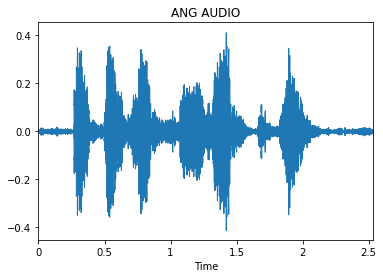

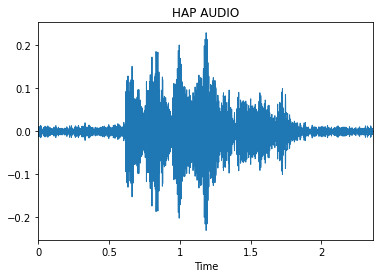

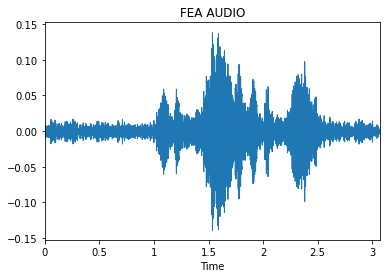

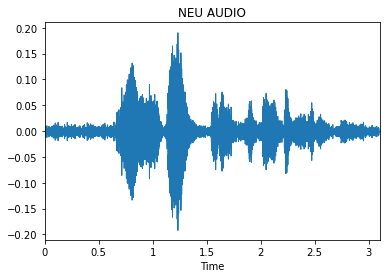

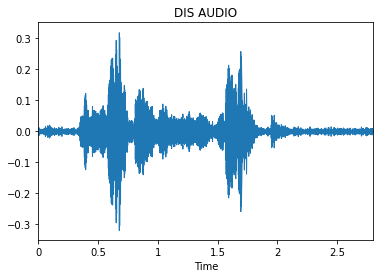

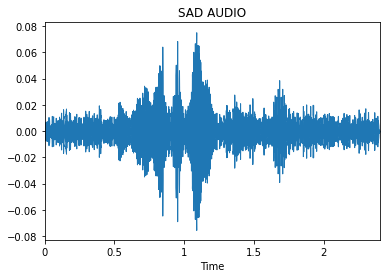

<Figure size 432x288 with 0 Axes>

In [ ]:
play_and_plot()

# 2)CREATE FEATURE SPACE


In [ ]:
def create_feature_space(_audio_data_frame , sampling_rate):
  zero_crossing_rate_Time = []
  singal_Energy = []
  mel_spectrogram = []

  for audio  in _audio_data_frame['signal']:
    zero_crossing_rate_Time.append(lib.feature.zero_crossing_rate(y = audio , frame_length= sampling_rate , center= False , hop_length= sampling_rate + 1))
    singal_Energy.append(lib.feature.rms(y = audio , frame_length= sampling_rate , center= False , hop_length= sampling_rate + 1))
    mel_spectrogram.append(lib.feature.melspectrogram(y= audio , sr= sampling_rate  , fmax = sampling_rate / 2 , n_mels= 128))
  
  zero_crossing_rate_Time = pd.Series(zero_crossing_rate_Time , name= 'zero_crossing_rate_Time')
  singal_Energy = pd.Series(singal_Energy , name= 'Energy')
  mel_spectrogram = pd.Series(mel_spectrogram , name= 'mel_spectrogram')
  _audio_data_frame = pd.concat([_audio_data_frame , zero_crossing_rate_Time , singal_Energy , mel_spectrogram] , axis=1)


  return _audio_data_frame



In [ ]:
_new_fs_data = create_feature_space(data , samples_rate[0])
_new_fs_data

,.wav_path,signal,labels,zero_crossing_rate_Time,Energy,mel_spectrogram
0,/content/drive/MyDrive/Crema/1081_MTI_FEA_XX.wav,"[-0.0013267642, -0.0011507067, -0.00074600475,...",FEA,"[[0.03541950113378685, 0.04793650793650794, 0....","[[0.004838971, 0.023397021, 0.014401618]]","[[0.09394837, 0.053181782, 0.014186205, 0.0264..."
1,/content/drive/MyDrive/Crema/1081_IOM_HAP_XX.wav,"[0.00406869, 0.004215974, 0.0030919232, 0.0023...",HAP,"[[0.04195011337868481, 0.03918367346938775]]","[[0.028267555, 0.036096077]]","[[0.10328176, 0.029865978, 0.013006479, 0.0349..."
2,/content/drive/MyDrive/Crema/1081_ITS_ANG_XX.wav,"[-0.00031764526, -0.00031087518, 0.00014127654...",ANG,"[[0.10603174603174603, 0.11895691609977324]]","[[0.063156895, 0.06499476]]","[[0.15801623, 0.0664605, 0.045276962, 0.116906..."
3,/content/drive/MyDrive/Crema/1079_TSI_DIS_XX.wav,"[0.001069233, 0.0007935993, -0.00016964517, -0...",DIS,"[[0.14653061224489797, 0.22929705215419502]]","[[0.041861326, 0.03471199]]","[[0.119025856, 0.04515943, 0.033564508, 0.1041..."
4,/content/drive/MyDrive/Crema/1081_IWL_HAP_XX.wav,"[3.5962148e-05, 0.00024702173, 0.00045050596, ...",HAP,"[[0.049569160997732425, 0.06099773242630385]]","[[0.078568526, 0.056647748]]","[[0.01506124, 0.036633626, 0.06401639, 0.08559..."
...,...,...,...,...,...,...
7446,/content/drive/MyDrive/Crema/1006_IOM_SAD_XX.wav,"[0.0014635584, 0.0016795307, 0.0010614916, 0.0...",SAD,"[[0.04526077097505669, 0.042585034013605444, 0...","[[0.013641751, 0.018153697, 0.006308418]]","[[0.0484424, 0.0788937, 0.08314693, 0.05090424..."
7447,/content/drive/MyDrive/Crema/1007_TSI_SAD_XX.wav,"[0.0033311676, 0.004324746, 0.0038436854, 0.00...",SAD,"[[0.04979591836734694, 0.05206349206349206, 0....","[[0.011511762, 0.008867607, 0.007987219]]","[[0.0041169287, 0.018827802, 0.021034693, 0.05..."
7448,/content/drive/MyDrive/Crema/1006_TAI_SAD_XX.wav,"[0.00387666, 0.0033433223, 0.002694597, 0.0031...",SAD,"[[0.03528344671201814, 0.07532879818594104, 0....","[[0.009519067, 0.015472551, 0.007677798]]","[[0.07351728, 0.16578901, 0.21401924, 0.141918..."
7449,/content/drive/MyDrive/Crema/1006_ITS_ANG_XX.wav,"[-0.00012446963, -0.000649155, -0.0005525435, ...",ANG,"[[0.0509297052154195, 0.13981859410430839, 0.0...","[[0.04325376, 0.06333134, 0.03640057]]","[[0.1524623, 0.08905956, 0.047622263, 0.092805..."


plot spectrogram


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

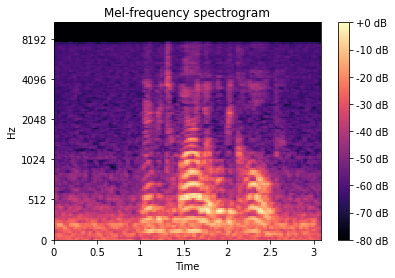

In [ ]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(_new_fs_data['mel_spectrogram'][0], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr= samples_rate[0],
                         fmax=samples_rate[0] / 2, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')